In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline
dataset = pd.read_csv('/content/Input/Iris.csv')
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<Axes: >

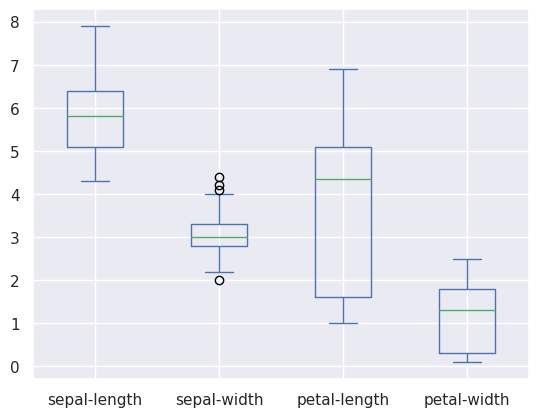

In [ ]:
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

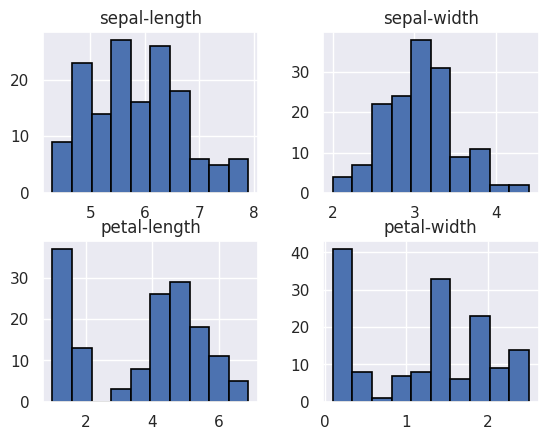

In [ ]:
dataset.hist(edgecolor='black', linewidth=1.2)

array([[<Axes: title={'center': 'petal-length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal-width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal-length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal-width'}, xlabel='[species]'>]],
      dtype=object)

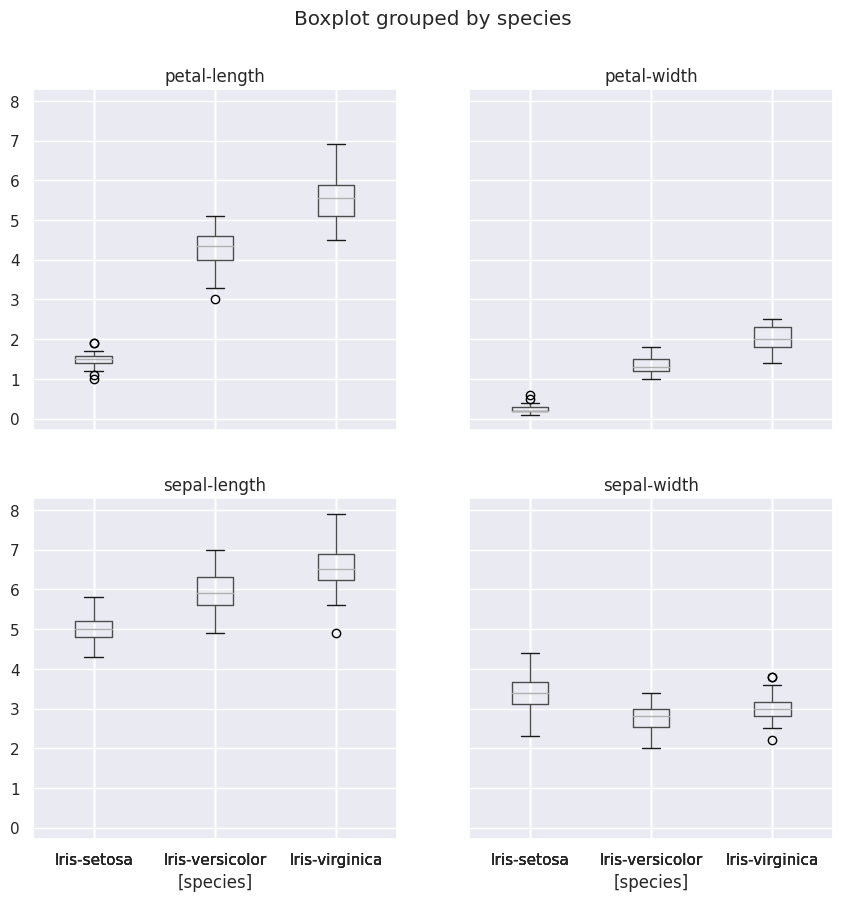

In [ ]:
dataset.boxplot(by="species",figsize=(10,10))

<Axes: xlabel='species', ylabel='petal-length'>

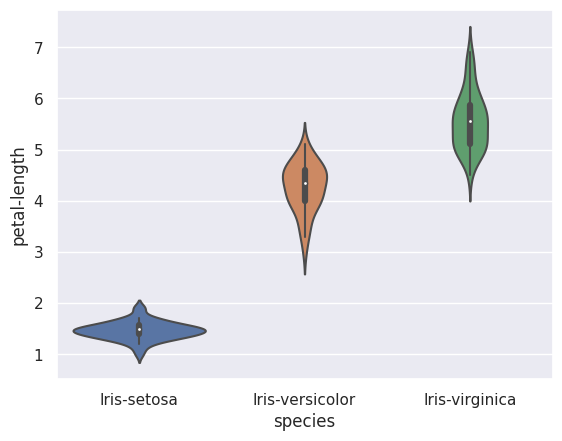

In [ ]:
sns.violinplot(data=dataset,x="species", y="petal-length")

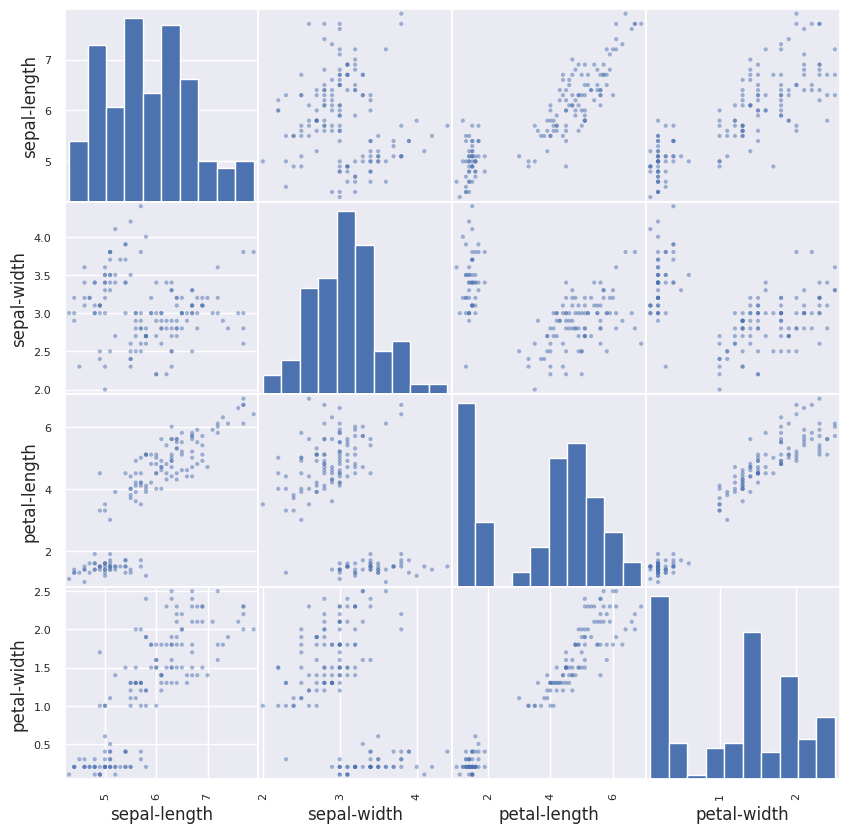

In [ ]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

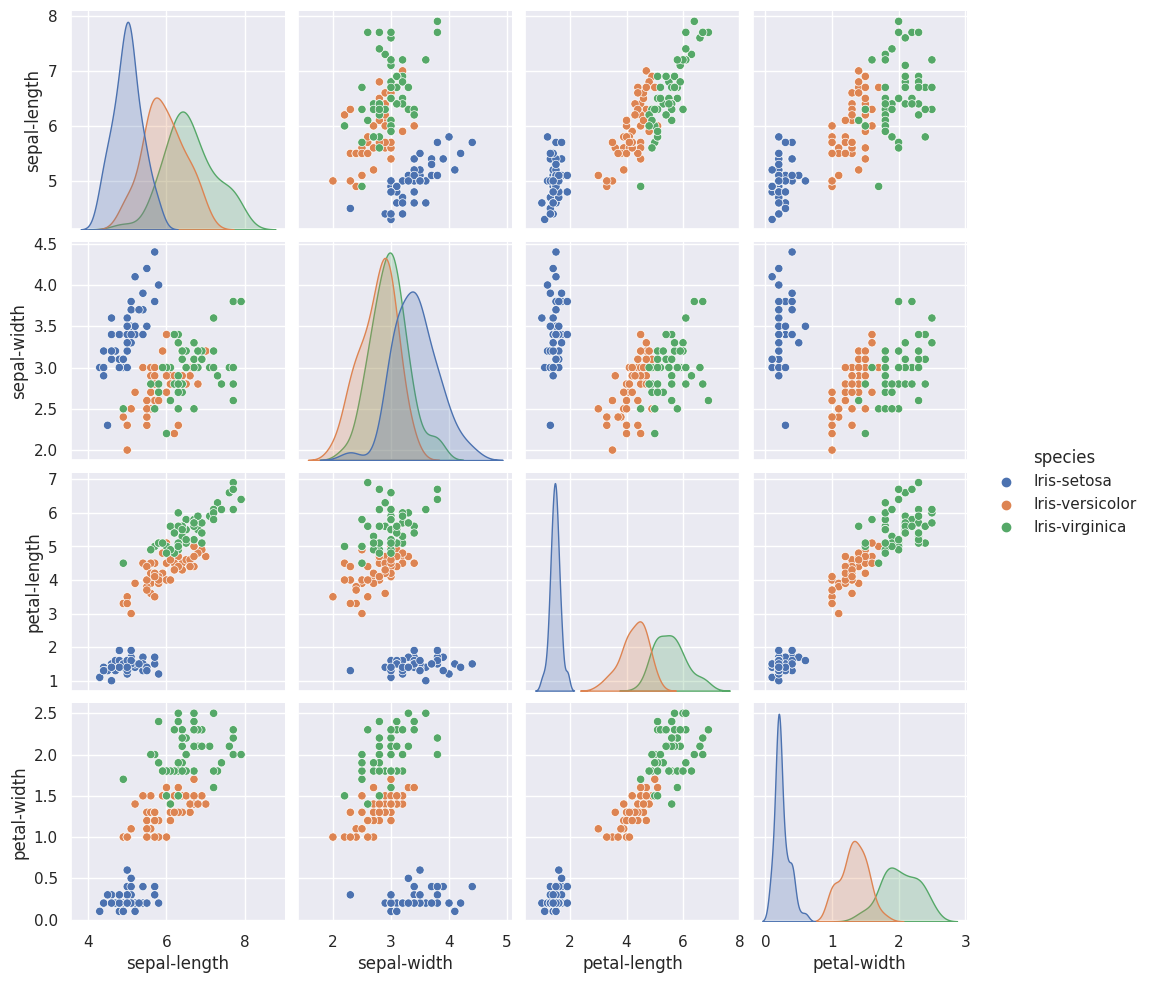

In [ ]:
sns.pairplot(dataset, hue="species")

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
#SVM
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print(y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('Độ chính xác là: %.2f %%'%(100*accuracy_score(y_test, y_pred)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45

[[13  0  0]
 [ 0 13  0]
 [ 0  3 16]]
Độ chính xác là: 93.33 %


In [ ]:
#KNN
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
#clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Độ chính xác là: %.2f %%'%(100*accuracy_score(y_test, y_pred)))

Độ chính xác là: 91.11 %


In [ ]:
x_new = np.array([[6.5,3.2,5.1,2.3]])
prediction = classifier.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-virginica']
